# Задания для самостоятельного решения


In [ ]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

import seaborn as sns

%load_ext lab_black

The lab_black extension is already loaded. To reload it, use:
  %reload_ext lab_black


In [ ]:
def mean_confidence_interval(data, confidence=0.95):
    """функция из лекции для определения границ доверительного интервала"""
    n = len(data)
    m, se = np.mean(data), stats.sem(data)
    h = se * stats.t.ppf((1 + confidence) / 2, n)
    return m - h, m, m + h

<div class="alert alert-info">
<b>Задание № 0</b>

Найдите минимально необходимый объем выборки для построения интервальной оценки среднего.

- желаемая точность $\Delta$ = 3;
- дисперсия $\sigma^2$  = 225;
- уровень доверия $\beta$ = 0.95.
    
Ответ округлите до целого
</div>

In [ ]:
### Ваши код/вычисления...
sigma = 225**0.5  # Стандартное отклонение
Z = 1.96  #  %   # Квантиль нормального распределения.
Delta = 3  #%         #Погрешность

n = int(((sigma * Z) / Delta) ** 2)  # Запишите в эту переменную ваш высчитанный ответ!
print(
    f"Минимально необходимый объем выборки для построения интервальной оценки среднего: {n}"
)

Минимально необходимый объем выборки для построения интервальной оценки среднего: 96


<div class="alert alert-info">
<b>Задание № 1</b>

Постройте `98% доверительный интервал` для среднего значения, если известно, что

- объем выборки n = 25;
- среднее значение по выборке $\overline x$ = 130;
- Из достоверных источников известно стандартное отклонение $\sigma = 15$.
    
В ответ укажите длину полученного доверительного интервала (разницу между правым и левым концом), окруленную до целого
</div>

In [ ]:
### Ваши код/вычесления...
# 1 - alfa/2 = 1 - (100-98)/2 = 0.99, из таблицы z = 2.576
n = 25
sigma = 15
x_mean = 130
z = 2.576
delta = (sigma / n**0.5) * z
L_0 = x_mean - delta
L_1 = x_mean + delta
L = int(2 * delta)
print(
    f"Левая граница доверительного интервала: {L_0}\nПравая граница доверительного интервала: {L_1}\nДлина доверительного интервала: {L}"
)

Левая граница доверительного интервала: 122.272
Правая граница доверительного интервала: 137.728
Длина доверительного интервала: 15


### 2. Вам даны две выборки роста мужчин и женщин. Докажите, используя t-Тест Стьдента, что различия между выборками незначительно, если уровень значимости равен 0.001

<div class="alert alert-info">
<b>Задание № 2</b>

Даны две выборки роста мужчин и женщин.
- Докажите, используя `t-Тест Стьдента`, что различие между выборками незначительно, если уровень значимости равен $\alpha$ `= 0.001`.
- Покажите различия визуально
</div>

(array([3.0000e+00, 1.1000e+01, 5.0000e+01, 1.3000e+02, 3.9200e+02,
        8.8000e+02, 2.0060e+03, 3.8910e+03, 6.9940e+03, 1.0830e+04,
        1.5273e+04, 1.8787e+04, 2.0337e+04, 1.9964e+04, 1.7262e+04,
        1.3184e+04, 9.1370e+03, 5.5330e+03, 2.9950e+03, 1.3980e+03,
        6.3400e+02, 2.1300e+02, 6.8000e+01, 2.5000e+01, 3.0000e+00]),
 array([-271.38859664, -236.8555874 , -202.32257816, -167.78956892,
        -133.25655968,  -98.72355044,  -64.1905412 ,  -29.65753196,
           4.87547728,   39.40848652,   73.94149577,  108.47450501,
         143.00751425,  177.54052349,  212.07353273,  246.60654197,
         281.13955121,  315.67256045,  350.20556969,  384.73857893,
         419.27158817,  453.80459741,  488.33760666,  522.8706159 ,
         557.40362514,  591.93663438]),
 <BarContainer object of 25 artists>)

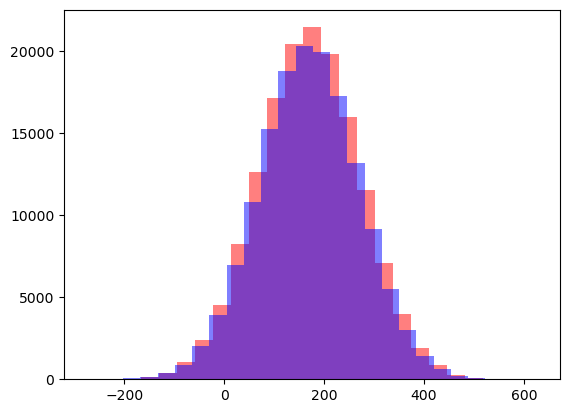

In [ ]:
import scipy.stats as stats

np.random.seed(42)  # фиксация случайности

# Выборка мужчин со средним ростом 171
mens = stats.norm.rvs(loc=171, scale=100, size=150000)

# Выборка женщин со средним ростом 170
women = stats.norm.rvs(loc=170, scale=100, size=150000)

# В двух строчках выше генерируется две выбороки, где loc это среднее значение, а scale это дисперсия

# убедимся, что распределение весьма близко к нормальному и критерий Стьюдента применим:
plt.hist(mens, bins=25, color="r", alpha=0.5)
plt.hist(women, bins=25, color="b", alpha=0.5)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f725a05ff70>,
 'caps': [<matplotlib.lines.Line2D at 0x7f725a06a550>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f725a05fca0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f725a06aaf0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f725a06adc0>],
 'means': []}

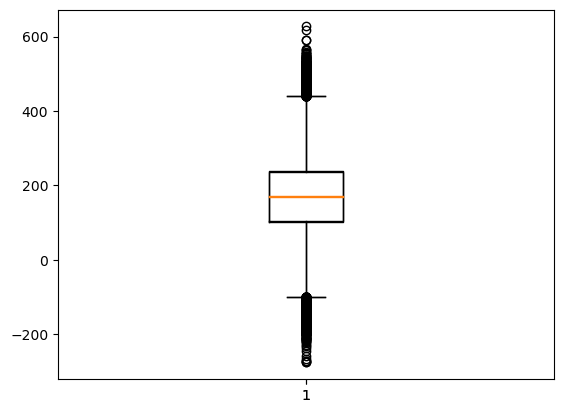

In [ ]:
plt.boxplot(mens)
plt.boxplot(women)

#### Мы располагаем двумя выборками и в качестве Н0 примем уотверждение о том, что выборки (каких-либо их характеристики, например среднее) не различаются. Теперь, если значение p-value окажется ниже заданного уровня значимости, Н0 должна быть отклонена. Если ниже - не должна. Так ведь?

In [ ]:
# t-критерий Стьюдента
stat, p = stats.ttest_ind(mens, women)
print("Statistics=%.4f, p-value=%.4f" % (stat, p))
alpha = 0.001
if p > alpha:
    print("Отичия статистически незначимы")
else:
    print("Отичия статистически значимы")

Statistics=3.6636, p-value=0.0002
Отичия статистически значимы


#### Вероятность получить такие или ещё большие различия между выбоорками при условии верности Н0 (различие между выборками незначительно) ниже заданного уровня значимости, значит отклоняем Н0 и доказать, что различие между выборками незначительно, невозможно. Различие **статистически значимо**.
#### **Но всё это как-то странно... Вель визуализация показывает, что выборки очень похожи**

In [ ]:
# может быть, в задании ошибка, и alpha должна быть равна 0.0001? Вот тогда:
stat, p = stats.ttest_ind(mens, women)
print("Statistics=%.4f, p-value=%.4f" % (stat, p))
alpha = 0.0001
if p > alpha:
    print("Отичия статистически незначимы")
else:
    print("Отичия статистически значимы")

Statistics=3.6636, p-value=0.0002
Отичия статистически незначимы


### 3. Определите объем необходимой выборки для исследования среднего чека за кофе в случайном городе, если известно, что в этом городе стандартное отклонение = 150, уровень доверия = 95%. Погрешность 50 рублей.

<div class="alert alert-info">
<b>Задание № 3</b>

Определите объем необходимой выборки для исследования среднего чека за кофе в случайном городе если известно, что в этом городе:

- стандартное отклонение $\sigma = 150$;
- уровень доверия $\beta$  = 95%;
- Погрешность $\Delta = 50$ рублей.
</div>

In [ ]:
### Ваш код...
sigma = 150  # Стандартное отклонение
Z = 1.96  #  %   # Квантиль нормального распределения.
Delta = 50  #         #Погрешность

n = int(((sigma * Z) / Delta) ** 2)  # Запишите в эту переменную ваш высчитанный ответ!
print(f"Минимально необходимый объем выборки: {n}")

Минимально необходимый объем выборки: 34


#### В задании 0 погрешность задана в %, здесь в абсолютных величинах. Насколько я понял, правильно задавать её в абсолютных величинах и в задании 0 опечатка. Или нет?

<div class="alert alert-info">
<b>Задание № 4</b>

Представьте, что вы хотите разоблачить "волшебника" который считает, что умеет предсказывать погоду на завтра, отвечая просто: дождь или солнце. Вы пронаблюдали за ответами "волшебника" в течении какого-то периода времени и получили некие результаты (см.ниже).

Можно ли сказать, что маг действительно умеет предсказывать погоду? Уровень значимости принять за `0.05` ($\alpha=0.05$).
</div>

In [ ]:
observations = pd.DataFrame(
    [[10, 15], [39, 34]],
    index=["Дождь", "Солнце"],
    columns=["Верные ответы волшебника", "Неверные ответы"],
)
observations

,Верные ответы волшебника,Неверные ответы
Дождь,10,15
Солнце,39,34


In [ ]:
import scipy.stats as stats

# Учтите, что у стат. тестов, в том числе и точного теста Фишера под нулевой гипотезой подразумевается случайность/отсутсвие эффекта

oddsratio, pvalue = stats.fisher_exact(observations)  # Возможно пригодится эта функция.

print(f"Отношение шансов: {oddsratio}, p_value: {pvalue}")

Отношение шансов: 0.5811965811965812, p_value: 0.35417955365927123


#### Отношение шансов < 1, p-value значительно больше уровня значимости: значит, получить такие результаты предсказания погоды случайным образом весьма вероятно. Н0 верна, волшебьник шарлатан или заблуждается.

<div class="alert alert-info">
<b>Задание № 5</b>

Используя функцию mean_confidence_interval(data, confidence), постройте доверительный интервал с уровнем доверия $\beta = 90\%$ для выборки:

</div>

In [ ]:
data = [
    4,
    5,
    8,
    9,
    6,
    7,
    5,
    6,
    7,
    8,
    5,
    6,
    7,
    0,
    9,
    8,
    4,
    6,
    7,
    9,
    8,
    6,
    5,
    7,
    8,
    9,
    6,
    7,
    5,
    8,
    6,
    7,
    9,
    5,
    10,
]

### Ваш код...
L_0, mean, L_1 = mean_confidence_interval(data, confidence=0.9)
print(
    f"Левая граница доверительного интервала: {L_0.round(3)}, середина: {mean.round(3)}, правая граница доверительного интервала: {L_1.round(3)}"
)

Левая граница доверительного интервала: 6.074, середина: 6.629, правая граница доверительного интервала: 7.183


<div class="alert alert-info">
<b>Задание № 6</b>

Принадлежат ли выборки `A` и `B` одному множеству?
    
- Оцените это с помощью известных вам тестов для проверок статистических гипотез;
- Покажите различия визуально.
</div>

In [ ]:
A = [
    4,
    5,
    8,
    9,
    6,
    7,
    5,
    6,
    7,
    6,
    8,
    5,
    6,
    7,
    8,
    4,
    6,
    7,
    9,
    8,
    6,
    5,
    7,
    8,
    6,
    7,
    5,
    6,
    8,
    6,
    7,
    5,
    4,
    5,
    8,
    9,
    6,
    7,
    5,
    6,
    7,
    6,
    8,
    5,
    6,
    7,
    8,
    4,
    6,
    7,
    9,
    8,
    6,
    5,
    7,
    8,
    6,
    7,
    5,
    6,
    8,
    6,
    7,
    5,
    4,
    5,
    8,
    9,
    6,
    7,
    5,
    6,
    7,
    6,
    8,
    5,
    6,
    7,
    8,
    4,
    6,
    7,
    9,
    8,
    6,
    5,
    7,
    8,
    6,
    7,
    5,
    6,
    8,
    6,
    7,
    5,
    4,
    5,
    8,
    9,
    6,
    7,
    5,
    6,
    7,
    6,
    8,
    5,
    6,
    7,
    8,
    4,
]

B = [
    5,
    6,
    7,
    8,
    4,
    6,
    7,
    2,
    6,
    5,
    7,
    5,
    3,
    5,
    3,
    5,
    3,
    5,
    5,
    8,
    7,
    6,
    4,
    5,
    3,
    5,
    4,
    6,
    4,
    5,
    3,
    2,
    6,
    4,
    3,
    5,
    4,
    3,
    4,
    5,
    4,
    3,
    4,
    5,
    4,
    3,
    4,
    2,
    6,
    4,
    3,
    5,
    4,
    3,
    4,
    5,
    4,
    3,
    4,
    5,
    4,
    3,
    4,
    3,
    4,
    4,
    1,
    2,
    4,
    3,
    2,
    4,
    3,
    2,
    1,
    5,
    3,
    4,
    6,
    3,
    2,
    4,
    5,
    6,
    4,
    3,
    3,
    5,
    3,
    4,
    4,
    4,
    2,
    5,
    3,
]

# Ваш код: в следующих ячейках

(array([10., 22., 48.,  9.,  6.]),
 array([1. , 2.4, 3.8, 5.2, 6.6, 8. ]),
 <BarContainer object of 5 artists>)

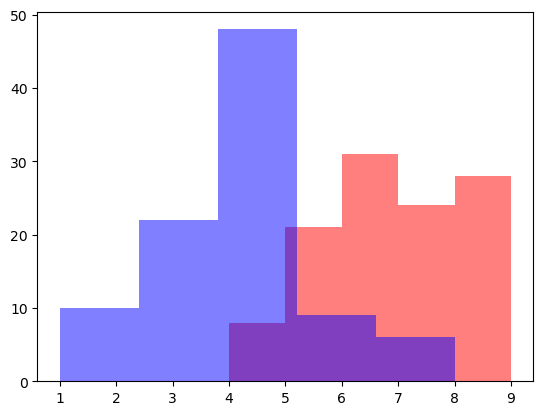

In [ ]:
plt.hist(A, bins=5, color="r", alpha=0.5)
plt.hist(B, bins=5, color="b", alpha=0.5)

In [ ]:
# проверим на нормальность распределения (критерий Шапиро-Уилка)
# примем alpha = 0.05
import scipy
import scipy.stats as stats

for data in [A, B]:
    name = "A" if data == A else "B"
    print(f"Для выборки {name}")
    stat, p = scipy.stats.shapiro(data)
    print("Statistics=%.3f, p-value=%.3f" % (stat, p))
    alpha = 0.05
    if p > alpha:
        print("Принять гипотезу о нормальности")
    else:
        print("Отклонить гипотезу о нормальности")

Для выборки A
Statistics=0.936, p-value=0.000
Отклонить гипотезу о нормальности
Для выборки B
Statistics=0.949, p-value=0.001
Отклонить гипотезу о нормальности


{'whiskers': [<matplotlib.lines.Line2D at 0x7f72598be130>,
 'caps': [<matplotlib.lines.Line2D at 0x7f72598be6d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f72598b3e20>],
 'medians': [<matplotlib.lines.Line2D at 0x7f72598becd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f72598befa0>],
 'means': []}

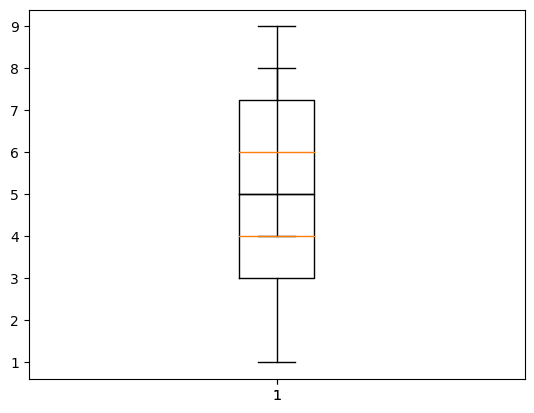

In [ ]:
# при этом среднее и прочие квантили существенно разнятся
plt.boxplot(A)
plt.boxplot(B)

In [ ]:
# Для распределения, отличного от нормального, возможно использовать критерий Манна-Уитни (непараметрический)
# 1. В качестве H0 рассматриваем утверждение о том, что медианы тестовой и контрольной выборки равны (проавда, уже на визуализациях видно, что это не так);
# 2. Применяем двусторонний тест, поскольку величина медиан может отличаться как в меньную, так и в большую сторону;
# 3. Принимаем значение alpha = 0.05.
stat, p = stats.mannwhitneyu(A, B, alternative="two-sided")
print("statistic=%.3f, p-value=%.3f" % (stat, p))
alpha = 0.05
if p > alpha:
    print("Принять гипотезу об однородности выборок")
else:
    print("Отклонить гипотезу об однородности выборок")

statistic=9280.500, p-value=0.000
Отклонить гипотезу об однородности выборок


In [ ]:
# Но можно использовать и критерий Стьюдента (параметрический), он тоже подойдёт
stat, p = stats.ttest_ind(A, B)
print("Statistics=%.3f, p-value=%.3f" % (stat, p))
alpha = 0.05
if p > alpha:
    print("Принять гипотезу об однородности выборок")
else:
    print("Отклонить гипотезу об однородности выборок")

Statistics=11.865, p-value=0.000
Отклонить гипотезу об однородности выборок


<div class="alert alert-info">
<b>Задание № 7 (задание без подвоха)</b>

На примере датасета про жилье в New York City, мы сталкивались с примером, когда переменная имеет не совсем нормальное распределение.

- Предположим, Вы сформировали две гипотезы:
    - нулевая гипотеза - распределение нормальное;
    - альтернативная гипотеза - распределение ненормальное.
- допустим, вы применили какой-то тест (сейчас неважно какой), который показал уровень значимости  `p-value = 0.03`. Каковы будут ваши выводы? Будем считать что у нас нормальное распределение или все-таки нет?)
    
</div>

### **Ваши выводы:**
#### Тест показывает p-value, а уровень значимости задаётся. Допустим, уровень значимости 0.05, а Н0 - распределение нормальное. Тогда p-value это веротность того, что при условии нормальности распределения величины (верности Н0) может быть получено распределение, отклоняющееся от нормального так, или ещё более сильно, чем отклоняется от нормального распределение исследуемого набора данных. Если эта вероятность низкая (ниже уровня значимости), значит, отклонение от нормального распределения не может возникнуть случайно и Н0 верна. Если вероятность отклонения от нормального распределения высока (выше уровня значимости), значит, это отклонение может возникнуть случайно и принимается Н1.
#### Другими словами: **если при постулировании некоторого утверждения (Н0) оказалось, что факты не соответствуют этому утверждению с высокой вероятностью, утверждение отклоняется.**

<div class="alert alert-info">
<b>Задание № 8</b>
    
Первая выборка — это пациенты, которых лечили препаратом `А`.  Вторая выборка — пациенты, которых лечили препаратом `B`.

Значения в выборках — это некоторая характеристика эффективности лечения (уровень метаболита в крови, температура через три дня после начала лечения, срок выздоровления, число койко-дней, и т.д.)

- Требуется выяснить, имеется ли значимое различие эффективности препаратов `А` и `B`, или различия являются чисто случайными и объясняются «естественной» дисперсией выбранной характеристики?  (`уровень значимости принять за 0.05 (5%)`)

- При каком минимальном p-value различия были бы уже значимы?
    
- Если выборки незначительно отличаются, то продемонстрируйте это визуально
</div>

In [ ]:
np.random.seed(11)
A = stats.norm.rvs(scale=15, loc=169, size=300)
B = stats.norm.rvs(scale=14, loc=171.4, size=300)

### Ваш код:
# Подсказка, обратите внимание на Two-sample T-test

(array([ 1.,  3., 11., 29., 40., 76., 69., 38., 23., 10.]),
 array([122.95604119, 131.18964287, 139.42324455, 147.65684623,
        155.89044792, 164.1240496 , 172.35765128, 180.59125296,
        188.82485464, 197.05845633, 205.29205801]),
 <BarContainer object of 10 artists>)

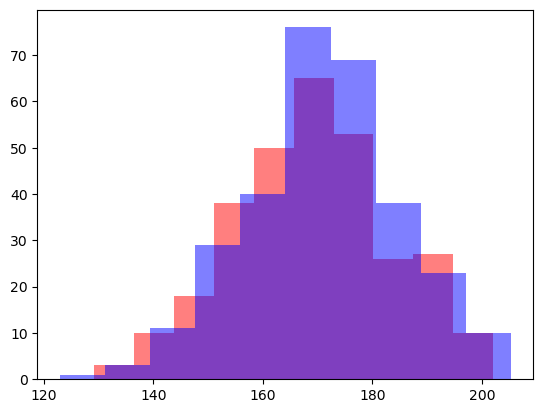

In [ ]:
# визуализируем распределение
plt.hist(A, bins=10, color="r", alpha=0.5)
plt.hist(B, bins=10, color="b", alpha=0.5)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f7259571d30>,
 'caps': [<matplotlib.lines.Line2D at 0x7f725957c310>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f7259571a60>],
 'medians': [<matplotlib.lines.Line2D at 0x7f725957c8b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f725957cb80>],
 'means': []}

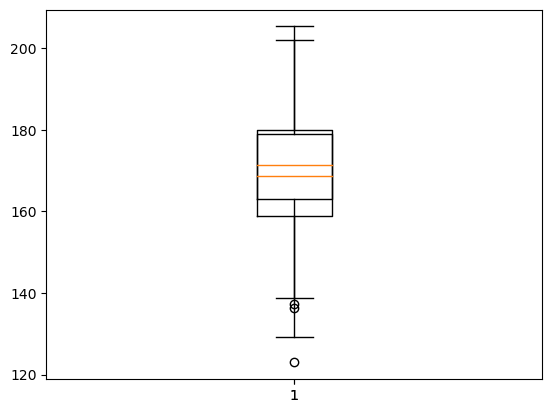

In [ ]:
plt.boxplot(A)
plt.boxplot(B)

In [ ]:
# проверим выборки на нормальность распределения (критерий Шапиро-Уилка) для уровня значимости 0.05
for data in [A, B]:
    name = "A" if data in A else "B"
    print(f"Для выборки {name}")
    stat, p = scipy.stats.shapiro(data)
    print("Statistics=%.3f, p-value=%.3f" % (stat, p))
    alpha = 0.05
    if p > alpha:
        print("Принять гипотезу о нормальности")
    else:
        print("Отклонить гипотезу о нормальности")

Для выборки A
Statistics=0.993, p-value=0.191
Принять гипотезу о нормальности
Для выборки B
Statistics=0.996, p-value=0.700
Принять гипотезу о нормальности


In [ ]:
# Стандартный независимый t-критерий с двумя выборками, который предполагает равные дисперсии генеральной совокупности.
# Если equal_var=False, выполняется t-критерий Уэлча , который не предполагает равных дисперсий генеральной совокупности.
stat, p = stats.ttest_ind(A, B, equal_var=True)
print("Statistics=%.3f, p-value=%.3f" % (stat, p))
alpha = 0.05
if p > alpha:
    print("Различия статистически значимы")
else:
    print("Различия статистически незначимы")

Statistics=-1.953, p-value=0.051
Различия статистически значимы


### **Выводы:**
#### 1. Эффективность препаратов А и В имеет статистически значимое отличие;
#### 2. Рассчитанное значение  p-value=0.051 как раз и есть то минимальное значение, при котором различие эффективности препаратов следует признать статистически значимым.